In [1]:
#TASK-4 SENTIMENT ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Sample dataset: Replace with your data
data = {
    'text': [
        "I love this product! It's amazing.",
        "Terrible experience, will not recommend.",
        "Average quality, not bad but not great either.",
        "Absolutely fantastic service, very happy!",
        "Worst purchase I've ever made."
    ],
    'sentiment': ['positive', 'negative', 'neutral', 'positive', 'negative']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print("\nSample data:")
print(df.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...



Sample data:
                                             text sentiment
0              I love this product! It's amazing.  positive
1        Terrible experience, will not recommend.  negative
2  Average quality, not bad but not great either.   neutral
3       Absolutely fantastic service, very happy!  positive
4                  Worst purchase I've ever made.  negative


In [5]:
# Data Preprocessing
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z ]+', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize words
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess_text)

print("\nPreprocessed data:")
print(df[['text', 'cleaned_text']].head())
# Split data into training and testing sets
X = df['cleaned_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


Preprocessed data:
                                             text  \
0              I love this product! It's amazing.   
1        Terrible experience, will not recommend.   
2  Average quality, not bad but not great either.   
3       Absolutely fantastic service, very happy!   
4                  Worst purchase I've ever made.   

                         cleaned_text  
0                love product amazing  
1       terrible experience recommend  
2    average quality bad great either  
3  absolutely fantastic service happy  
4        worst purchase ive ever made  


In [10]:
# Classification Report with zero_division to handle warnings
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)  # Removed zero_division argument
print(conf_matrix)



Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       1.0
    positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Confusion Matrix:
[[0 1]
 [0 0]]


Accuracy: 0.00%


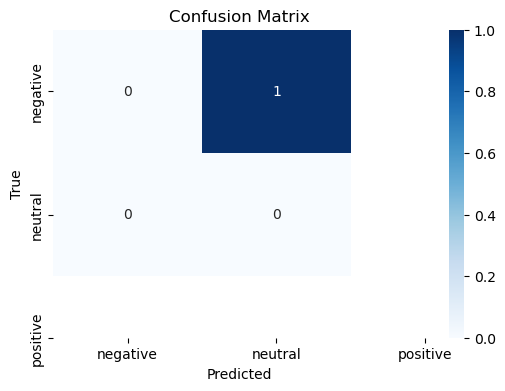


Insights:
Model achieved an accuracy of 0.00% on the test data.
The confusion matrix indicates the performance of the model across different sentiment classes.


In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Visualization of Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Insights
print("\nInsights:")
print(f"Model achieved an accuracy of {accuracy * 100:.2f}% on the test data.")
print("The confusion matrix indicates the performance of the model across different sentiment classes.")